<a href="https://colab.research.google.com/github/ArunabhaDeb2018/DeepLearning_CNN/blob/master/TF2_0_MobileNetV1_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,BatchNormalization,Dropout,Input,Conv2D,GlobalAveragePooling2D,DepthwiseConv2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
num_classes=len(set(y_train[:,0]))

In [ ]:
X_train,X_test=X_train/255.0,X_test/255.0

In [ ]:
i=Input(shape=X_train[0].shape)

In [ ]:
def conv_block(input,no_filters,kernel_sz,stride,padding):
  '''Conv2D->BatchNormalization->Relu'''
  output=Conv2D(no_filters,kernel_size=kernel_sz,strides=stride,padding=padding)(input)
  output=BatchNormalization()(output)
  output=Activation('relu')(output)
  return output

In [ ]:
def conv_block_depthwise(input,kernel_sz,stride,padding,multiplier,no_out_channels):
  '''DepthwiseConv->BatchNormalization->Relu->Conv2D(1x1)->BatchNormalization->Relu
  output number of channels of DepthwiseConv2D() depends upon multiplier
  if multiplier==1 then no. of input channels is same as no. of output channels'''

  output=DepthwiseConv2D(kernel_size=kernel_sz,strides=stride,padding=padding,depth_multiplier=multiplier)(input)
  output=BatchNormalization()(output)
  output=Activation('relu')(output) 
  
  output=Conv2D(no_out_channels,kernel_size=(1,1),padding='same',strides=1)(output)
  output=BatchNormalization()(output)
  output=Activation('relu')(output)

  return output

In [ ]:
def my_mobilenet_v1(input,num_classes):
  x=conv_block(input,no_filters=32,kernel_sz=(3,3),stride=2,padding='same')

  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=64)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=2,padding='same',multiplier=1,no_out_channels=128)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=128)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=2,padding='same',multiplier=1,no_out_channels=256)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=256)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=2,padding='same',multiplier=1,no_out_channels=512)

  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=512)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=512)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=512)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=512)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=1,padding='same',multiplier=1,no_out_channels=512)

  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=2,padding='same',multiplier=1,no_out_channels=1024)
  x=conv_block_depthwise(x,kernel_sz=(3,3),stride=2,padding='same',multiplier=1,no_out_channels=1024)

  x=GlobalAveragePooling2D()(x)
  x=Dense(1024,activation='relu')(x)
  output=Dense(num_classes,activation='softmax')(x)

  return output





In [ ]:
output=my_mobilenet_v1(input=i,num_classes=num_classes)

In [ ]:
model=Model(inputs=i,outputs=output)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_27 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
depthwise_conv2d_13 (Depthwi (None, 16, 16, 32)        320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_28 (Activation)   (None, 16, 16, 32)       

In [ ]:
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8091 - accuracy: 0.3229 - val_loss: 1.8104 - val_accuracy: 0.3945
Epoch 2/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4799 - accuracy: 0.4634 - val_loss: 1.7242 - val_accuracy: 0.4498
Epoch 3/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3129 - accuracy: 0.5354 - val_loss: 1.5188 - val_accuracy: 0.5342
Epoch 4/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1679 - accuracy: 0.5904 - val_loss: 1.2652 - val_accuracy: 0.5736
Epoch 5/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0450 - accuracy: 0.6398 - val_loss: 1.1220 - val_accuracy: 0.6318
Epoch 6/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9364 - accuracy: 0.6772 - val_loss: 1.0555 - val_accuracy: 0.6589
Epoch 7/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8479 - accuracy: 0.7072 - val_loss: 0.9437 -

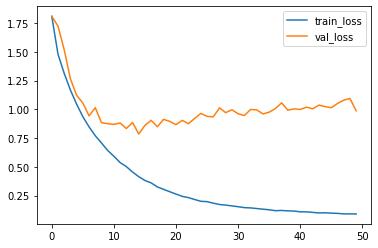

In [ ]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()

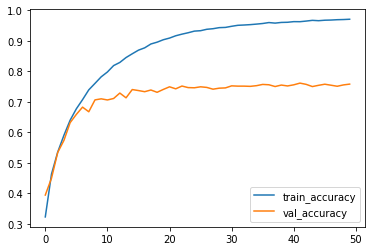

In [ ]:
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.legend()